In [77]:
## All purpose library
import pandas as pd
import numpy as np

## NLP library
import re
import string
import nltk

## ML Library
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Visualization library
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Ignoring Warning during trainings 
import warnings
warnings.filterwarnings('ignore')

In [78]:
## using pandas read_csv funtion to load csv files
train_dataset=pd.read_csv("train.csv")
test_dataset=pd.read_csv("test.csv")

In [79]:
# Displaying the data in both training and testing dataset
print("Training Data in our Dataset")
display(train_dataset.head())
print("Testing Data in our Dataset")
display(test_dataset.head())

Training Data in our Dataset


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Testing Data in our Dataset


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [80]:
# Displaying the number of columns and rows in both the training and testing dataset
print("Train Dataset \n",train_dataset.shape,"\n") 
print("Test Dataset\n",test_dataset.shape) 

Train Dataset 
 (7613, 5) 

Test Dataset
 (3263, 4)


In [81]:
# Here in our Training dataset it contains 5 columns in which 1 column is target varibale
# Here in our Testing dataset it contains only 4 columns

In [82]:
# Displaying columns in both Training and Testing dataset
print("Training Dataset \n", train_dataset.columns, "\n")
print("Testing Dataset \n", test_dataset.columns, "\n")

Training Dataset 
 Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object') 

Testing Dataset 
 Index(['id', 'keyword', 'location', 'text'], dtype='object') 



In [83]:
# Displaying info for the dataset
print("Training Dataset \n", train_dataset.info(), "\n")
print("Testing Dataset \n", test_dataset.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
Training Dataset 
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
Testing Dataset 
 None 



In [84]:
# Checking for null values in our dataset
print("Train Dataset missing data:\n",train_dataset.isnull().sum(),"\n")
print("Test Dataset missing data:\n",test_dataset.isnull().sum())

Train Dataset missing data:
 id             0
keyword       61
location    2533
text           0
target         0
dtype: int64 

Test Dataset missing data:
 id             0
keyword       26
location    1105
text           0
dtype: int64


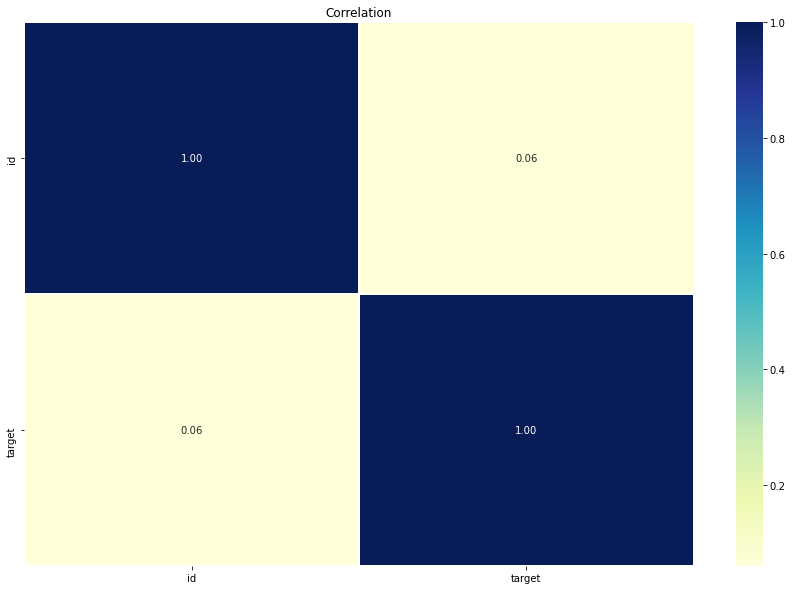

In [85]:
# We are checking the correlation within the features with the target variable
correlation_matrix = train_dataset.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu")
plt.title('Correlation');

In [86]:
## using pandas value counts on target will give us number of 0's that will give us non-disaster tweets,
## and 1's which will give us disaster tweets. 
VCtrain=train_dataset['target'].value_counts().to_frame()
VCtrain

,target
0,4342
1,3271


<AxesSubplot:ylabel='target'>

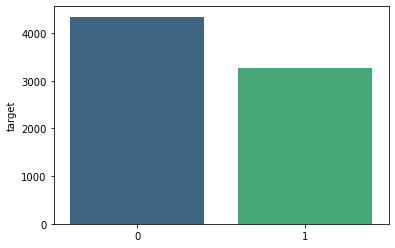

In [87]:
# Using seaborn barplot to visualize target variable in our Training Dataset
sns.barplot(data=VCtrain,x=VCtrain.index,y="target",palette="viridis")

In [88]:
## Checking random samples of disaster as well as non disaster tweets
display("Random sample of disaster tweets:",train_dataset[train_dataset.target==1].text.sample(3).to_frame())
display("Random sample of non disaster tweets:",train_dataset[train_dataset.target==0].text.sample(3).to_frame())

'Random sample of disaster tweets:'

,text
5604,The Latest: More Homes Razed by Northern Calif...
7020,Global precipitation measurement satellite cap...
5088,http://t.co/GaM7otGISw\nANOTHER DISASTER WAITI...


'Random sample of non disaster tweets:'

,text
2705,Ignition Knock (Detonation) Sensor ACDelco GM ...
2350,Last chance to work at the old FFA foodstand a...
6988,I'm in bed eating a twister and drinking a cup...


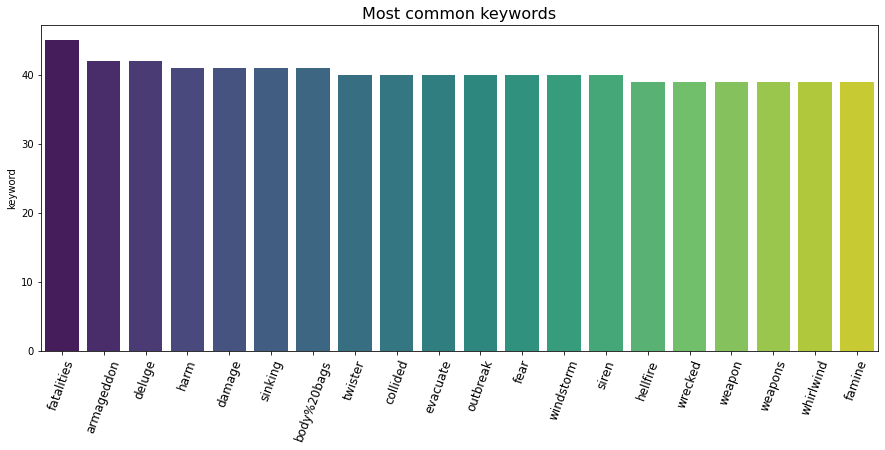

In [89]:
# Most common keywords in the dataset
common_keywords=train_dataset["keyword"].value_counts()[:20].to_frame()
fig=plt.figure(figsize=(15,6))
sns.barplot(data=common_keywords,x=common_keywords.index,y="keyword",palette="viridis")
plt.title("Most common keywords",size=16)
plt.xticks(rotation=70,size=12);

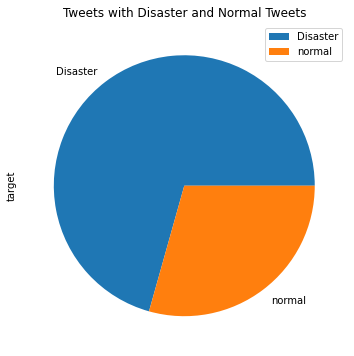

In [90]:
# Using the PIE chart plotting the tweets with disaster and normal tweets
train_dataset[train_dataset.text.str.contains("disaster")].target.\
 value_counts().to_frame().rename(index={1:"Disaster",0:"normal"}).\
  plot.pie(y="target",figsize=(12,6),title="Tweets with Disaster and Normal Tweets");

In [91]:
# Location where more disaster tweets was identified
train_dataset.location.value_counts()[:10].to_frame()

,location
USA,104
New York,71
United States,50
London,45
Canada,29
Nigeria,28
UK,27
"Los Angeles, CA",26
India,24
Mumbai,22


In [92]:
# As a part of our next step we are going to perform text cleaning 
# where in we will we will lower the text
# remove square brackets
# remove hyperlink
# remove punctuation
# remove words containing numbers

In [93]:
# We will define a function called Clean wherein we will perform all the above actions
def Clean(text):
    #remove URL
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    text = re.sub(r'http?:\/\/.*[\r\n]*', '', text)
    #remove special character
    text=text.replace(r'&amp;?',r'and')
    text=text.replace(r'&lt;',r'<')
    text=text.replace(r'&gt;',r'>')  
    #remove words containing numbers      
    text = re.sub(r"(?:\@)\w+", '', text)
    text=text.encode("ascii",errors="ignore").decode()
    text=re.sub(r'[:"#$%&\*+,-/:;<=>@\\^_`{|}~]+','',text)
    #remove square brackets
    text=re.sub(r'[!]+','!',text)
    text=re.sub(r'[?]+','?',text)
    text=re.sub(r'[.]+','.',text)
    #remove punctuation     
    text=re.sub(r"'","",text)
    text=re.sub(r"\(","",text)
    text=re.sub(r"\)","",text)
    
    text=" ".join(text.split())
    return text

In [94]:
# Calling the function to perform text cleaning 
train_dataset['text']=train_dataset['text'].apply(lambda x: Clean(x))
test_dataset['text']=test_dataset['text'].apply(lambda x: Clean(x))

In [95]:
# Displaying the result
print("Training Dataset after Text Cleaning \n\n ", train_dataset['text'].head(5), "\n")
print("Text Dataset after Text Cleaning \n\n ", test_dataset['text'].head(5))

Training Dataset after Text Cleaning 

  0    Our Deeds are the Reason of this earthquake Ma...
1                Forest fire near La Ronge Sask Canada
2    All residents asked to shelter in place are be...
3    13000 people receive wildfires evacuation orde...
4    Just got sent this photo from Ruby Alaska as s...
Name: text, dtype: object 

Text Dataset after Text Cleaning 

  0                   Just happened a terrible car crash
1    Heard about earthquake is different cities sta...
2    there is a forest fire at spot pond geese are ...
3                Apocalypse lighting Spokane wildfires
4        Typhoon Soudelor kills 28 in China and Taiwan
Name: text, dtype: object


In [96]:
# Word Cloud of tweets to visualize disater tweets words and non disaster tweets
disaster_tweets = train_dataset[train_dataset['target']==1]['text']
non_disaster_tweets = train_dataset[train_dataset['target']==0]['text']

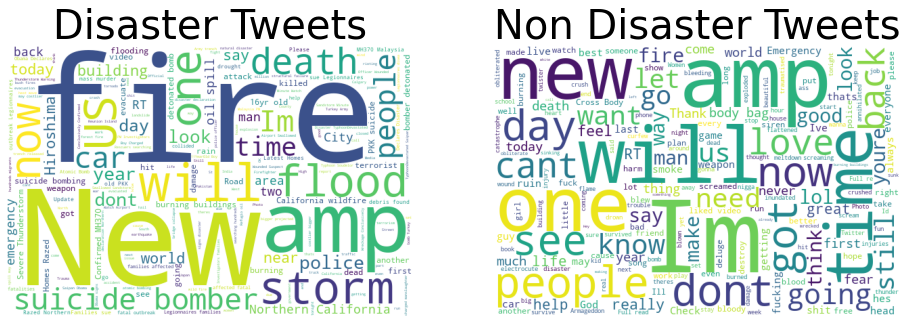

In [97]:
# Plotting the diagram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16, 8])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(disaster_tweets))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Disaster Tweets',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(non_disaster_tweets))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Non Disaster Tweets',fontsize=40);

In [98]:
# Tokenization
# Where we will split the string into tokens

In [99]:
#Tokenizer
token=nltk.tokenize.RegexpTokenizer(r'\w+')

In [100]:
#Applying token to the dataset
train_dataset.text=train_dataset.text.apply(lambda x:token.tokenize(x))
test_dataset.text=test_dataset.text.apply(lambda x:token.tokenize(x))

In [101]:
#Displaying the result
display(train_dataset.text.head())

0    [Our, Deeds, are, the, Reason, of, this, earth...
1        [Forest, fire, near, La, Ronge, Sask, Canada]
2    [All, residents, asked, to, shelter, in, place...
3    [13000, people, receive, wildfires, evacuation...
4    [Just, got, sent, this, photo, from, Ruby, Ala...
Name: text, dtype: object

In [102]:
# Stemming 
# We will cut the words using PorterStemmer

In [103]:
#Stemmering the text and joining
stemmer = nltk.stem.PorterStemmer()
train_dataset.text=train_dataset.text.apply(lambda x:" ".join(stemmer.stem(token) for token in x))
test_dataset.text=test_dataset.text.apply(lambda x:" ".join(stemmer.stem(token) for token in x))

In [104]:
#Displaying the result
train_dataset.text.head()

0    our deed are the reason of thi earthquak may a...
1                 forest fire near la rong sask canada
2    all resid ask to shelter in place are be notif...
3    13000 peopl receiv wildfir evacu order in cali...
4    just got sent thi photo from rubi alaska as sm...
Name: text, dtype: object

In [105]:
# Splitting the data
feature=train_dataset['text']
target =train_dataset['target']
X_train, X_test, Y_train, Y_test = train_test_split(feature,target,test_size = 0.2,random_state =24)

In [106]:
# Text Vectorization
# ML Algorithms must take numerical feature vectors as input
# When working with text documents we need to convert each document into a numeric vector 

In [107]:
# We are using Countvectorizer to perform this operation

In [108]:
vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\b[a-zA-Z]{3,}\b' ,ngram_range=(1, 1))
vectorized = vectorizer.fit_transform(X_train)
tfidf = TfidfTransformer(smooth_idf=True, use_idf=True)
trainfeature = tfidf.fit_transform(vectorized)

In [109]:
TFIDF= TfidfVectorizer(encoding='utf-8',
                       ngram_range=(1,1),
                       max_features=11000, 
                       norm='l2',
                       sublinear_tf=True)

In [110]:
TrainFeat_= TFIDF.fit_transform(X_train)

In [111]:
TestFeat_ = TFIDF.transform(X_test)

In [112]:
# Building and testing the model

In [113]:
# We are using Simple Naive Bayes to predict our model
classifier = MultinomialNB()
classifier.fit(TrainFeat_,Y_train)
test_pred= classifier.predict(TestFeat_)
accuracy = accuracy_score(Y_train, classifier.predict(TrainFeat_))
print("Accuracy of the Training model:", accuracy)

Accuracy of the Training model: 0.8668308702791462


In [114]:
# Displaying the accuracy of the testing model
testing_accuracy = accuracy_score(Y_test, test_pred)
print("Accuracy of the Testing model:", testing_accuracy)

Accuracy of the Testing model: 0.8082731451083388


In [115]:
# We are printing the classification report for our dataset and model
print(classification_report(Y_test, test_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       875
           1       0.86      0.65      0.74       648

    accuracy                           0.81      1523
   macro avg       0.82      0.79      0.80      1523
weighted avg       0.82      0.81      0.80      1523

